In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import save_model
import csv 
import pandas as pd 
from IPython.display import display, HTML
import h5py
from random import shuffle

/home/lehloks/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
import pandas as pd
import numpy as np
import re
import collections

In [ ]:
from keras.callbacks import ModelCheckpoint

### Loading the dataset

In [3]:
data_text = x_train_text
idx = 5
print(x_train_text[idx],'\n',y_train[idx])

I hate Harry Potter, that daniel wotshisface needs a fucking slap... 
 0


In [14]:
import json
import keras
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [18]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [28]:
from pandas import read_excel

In [31]:
cd ../

/mnt/c/Users/user/Desktop/DATAJason


In [33]:
df= read_excel('test1.xlsx')

In [34]:
df.head()

,Code,Message
0,1,I have classes
1,1,it was nice seeing u too
2,1,hectic right
3,1,lol
4,1,too much studying


In [35]:
df = df.reindex(np.random.permutation(df.index))  
df = df[['Message', 'Code']]
df.head()

,Message,Code
785371,Yebo Samson,0
145800,Good morning,1
446815,Ready to start Usulungele ukuqala,0
727260,What time today would you like to have it as I...,1
8689,Sanibona,0


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

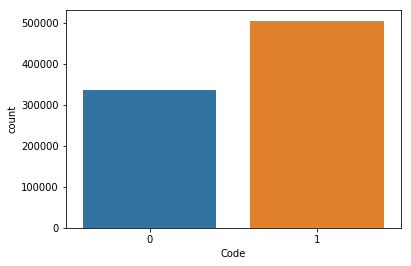

In [37]:
sns.countplot(x='Code', data=df)

In [39]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df.Message = df.Message.apply(remove_stopwords).apply(remove_mentions)
df.head()

,Message,Code
785371,Yebo Samson,0
145800,Good morning,1
446815,Ready start Usulungele ukuqala,0
727260,What time today would like Im free,1
8689,Sanibona,0


In [40]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Code, test_size=0.1, random_state=37)
print('Training Data:', X_train.shape[0])
print('Test Data:', X_test.shape[0])

Training Data: 756469
Test Data: 84053


In [43]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Top 5 most common words are: [('lesson', 68231), ('sanibona', 57886), ('sawubona', 47711), ('yebo', 46344), ('well', 44541)]


In [44]:
word_index = tk.word_index
print('Found %s unique tokens.' % len(word_index))

Found 29412 unique tokens.


In [45]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [46]:
print('{} -- is converted to -- {}'.format(X_train[5], X_train_seq[5]))

nice one -- is converted to -- [354, 4573, 407, 221, 153]


In [47]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    756469.000000
mean          5.598069
std           8.858563
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max         182.000000
Name: Message, dtype: float64

In [48]:
from keras.preprocessing.sequence import pad_sequences

In [49]:
MAX_LEN = 24
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [50]:
print('{} -- is converted to -- {}'.format(X_train_seq[5], X_train_seq_trunc[5]))

[354, 4573, 407, 221, 153] -- is converted to -- [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  354 4573  407  221  153]


In [51]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [52]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

print('Shape of train set:',X_train_emb.shape)
print('Shape of validation set:',X_valid_emb.shape)

Shape of train set: (680822, 24)
Shape of validation set: (75647, 24)


In [53]:
from keras import models
from keras import layers

In [56]:
model = models.Sequential()
model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath='models.hdf5')]

In [57]:
history = model.fit(X_train_emb, y_train_emb, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_valid_emb, y_valid_emb))

Train on 680822 samples, validate on 75647 samples
Epoch 1/20
680822/680822 [==============================] - 146s 214us/step - loss: 0.1560 - acc: 0.9392 - val_loss: 0.1015 - val_acc: 0.9665
Epoch 2/20
680822/680822 [==============================] - 154s 226us/step - loss: 0.0937 - acc: 0.9691 - val_loss: 0.0945 - val_acc: 0.9683
Epoch 3/20
680822/680822 [==============================] - 155s 227us/step - loss: 0.0881 - acc: 0.9707 - val_loss: 0.0920 - val_acc: 0.9698
Epoch 4/20
680822/680822 [==============================] - 160s 235us/step - loss: 0.0841 - acc: 0.9717 - val_loss: 0.0880 - val_acc: 0.9702
Epoch 5/20
680822/680822 [==============================] - 156s 230us/step - loss: 0.0802 - acc: 0.9724 - val_loss: 0.0856 - val_acc: 0.9705
Epoch 6/20
680822/680822 [==============================] - 145s 213us/step - loss: 0.0767 - acc: 0.9729 - val_loss: 0.0843 - val_acc: 0.9712
Epoch 7/20
680822/680822 [==============================] - 144s 212us/step - loss: 0.0739 - acc:

In [58]:
def plot(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, EPOCHS + 1)

    plt.plot(e, metric, 'ro', label='Training ' + metric_name)
    plt.plot(e, val_metric, 'r', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

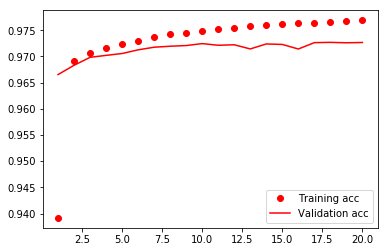

In [59]:
plot(history, 'acc')

In [60]:
test_model = model.evaluate(X_test_seq_trunc, y_test_oh)

84053/84053 [==============================] - 7s 82us/step


In [61]:
print('Test accuracy is {0:.2f}%'.format(test_model[1] * 100))

Test accuracy is 97.36%


In [62]:
pwd

'/mnt/c/Users/user/Desktop/DATAJason'